In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
plt.ion()
# Loads nicard and scope
manager.startModule('logic','cavitylogic')
filenames = glob.glob('./*data.dat')

print(filenames)
outlier_cutoff = 1.5

['.\\2017-08-15_151042_full_sweep_data.dat', '.\\2017-08-15_151505_full_sweep_data.dat', '.\\2017-08-15_151553_full_sweep_data.dat', '.\\2017-08-15_151659_full_sweep_data.dat']


In [1]:
#cavitylogic.start_full_sweep()

In [3]:
#cavitylogic._get_scope_data()

In [4]:
fileNum=2
cavitylogic._load_full_sweep(filepath='', filename=filenames[fileNum])
#cavitylogic._load_full_sweep(filename='2017-08-15_151553_full_sweep_data.dat')

cavitylogic._get_ramp_up_signgals()
cavitylogic._polyfit_SG(order = 3,plot=False)
resonances = cavitylogic._peak_search(cavitylogic.RampUp_signalR)
corrected_resonances = cavitylogic._find_missing_resonances(resonances)

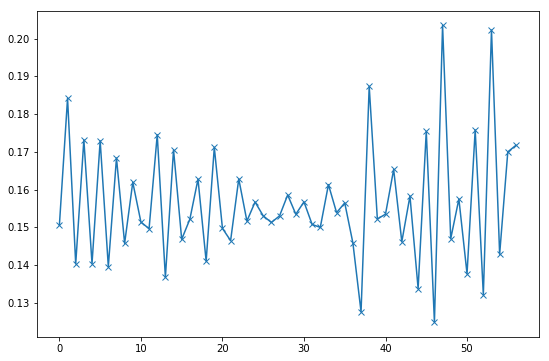

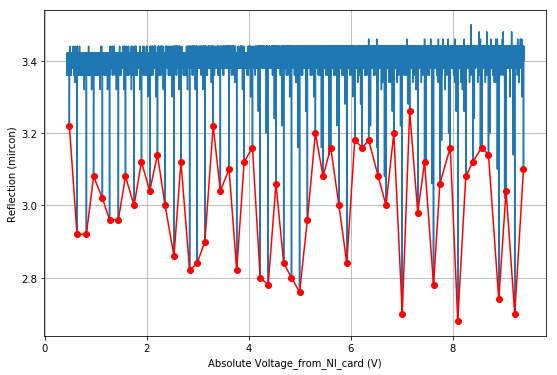

In [5]:
delta_peaks = cavitylogic._update_peaks_distance(corrected_resonances)
plt.plot(delta_peaks,'x-')
plt.show()
    
plt.plot(cavitylogic.RampUp_signalSG_polyfit, cavitylogic.RampUp_signalR)
plt.plot(cavitylogic.RampUp_signalSG_polyfit[corrected_resonances],  cavitylogic.RampUp_signalR[corrected_resonances],'r',marker ='o')
plt.xlabel('Absolute Voltage_from_NI_card (V)')
plt.ylabel('Reflection (mircon)')
plt.grid('on')
#plt.xlim(8.0,9.2)
plt.show()


In [34]:
cavitylogic._fit_ramp()

(-3.5, 1)

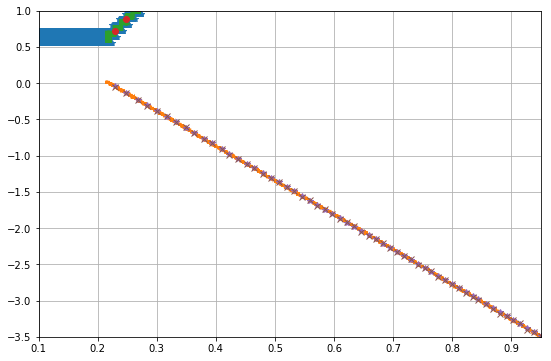

In [35]:
A = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[corrected_resonances],*cavitylogic.popt)
AD = cavitylogic.RampUp_signalSG[corrected_resonances]
B = cavitylogic.RampUp_signalNI[corrected_resonances]
C = cavitylogic.volts_trim[1]
D = cavitylogic.volts_trim[3]
E = cavitylogic.volts[3]
plt.plot(cavitylogic.time,E, '-*', linewidth =0.3)
plt.plot(cavitylogic.time_trim,C, '--', linewidth =0.3)
plt.plot(cavitylogic.time_trim,D, '--', linewidth =0.3)
plt.plot(cavitylogic.RampUp_time[corrected_resonances],AD,'o')
plt.plot(cavitylogic.RampUp_time[corrected_resonances],A,'*')
plt.plot(cavitylogic.RampUp_time[corrected_resonances],B,'x')
plt.grid()
#plt.xlim(0.1,0.95)
#plt.ylim(-3.5,1)

In [39]:
Modes = cavitylogic._ni.sweep_function(cavitylogic.RampUp_time[corrected_resonances],*cavitylogic.popt)

for i in [2, 3, 4, 5]:
    Amplitude = abs(Modes[i-1]-Modes[i+1])/2.0
    offset = Modes[i]
    freq = 15
    
cavitylogic._ni.set_up_ramp_output(Amplitude,offset,freq)

0

In [40]:
cavitylogic._ni.start_ramp()

0

In [38]:
cavitylogic._ni.stop_ramp()
cavitylogic._ni.close_ramp()

0

In [17]:
# Go to position
#Rescale NI:
cavitylogic._ni.cavity_set_position(20.0e-6) # 0 V

# Measure position


volts[ -4.44089210e-16]


0

In [7]:
cavitylogic.volts

array([[ 3.4  ,  3.38 ,  3.38 , ...,  3.42 ,  3.42 ,  3.4  ],
       [ 0.   , -0.02 ,  0.   , ..., -0.02 ,  0.   ,  0.   ],
       [-0.008, -0.004, -0.004, ..., -0.012, -0.008, -0.012],
       [ 0.44 ,  0.44 ,  0.52 , ...,  0.68 ,  0.68 ,  0.68 ]])